In [82]:
import numpy as np
import sep

In [83]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import rcParams

# additional setup for reading the test image and displaying plots
%matplotlib inline

rcParams['image.origin'] = 'lower'

In [84]:
data = fits.getdata("f105W.fits")

In [85]:
data = data.byteswap().newbyteorder()

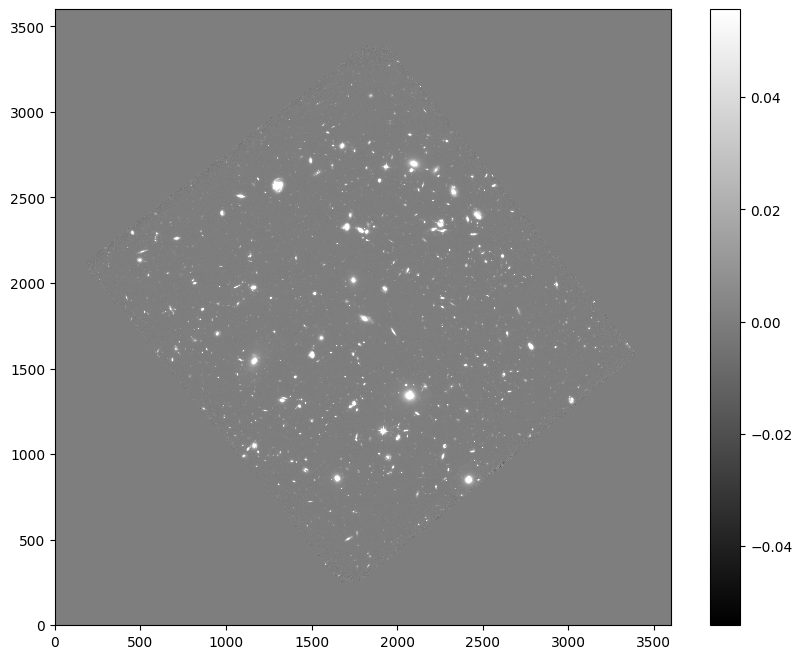

In [86]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.show()

In [87]:
bkg = sep.Background(data)

In [88]:
print("Global background:", bkg.globalback)
print("Global RMS:", bkg.globalrms)

Global background: 0.0
Global RMS: 0.0005398219218477607


In [89]:
bkg_image = bkg.back()

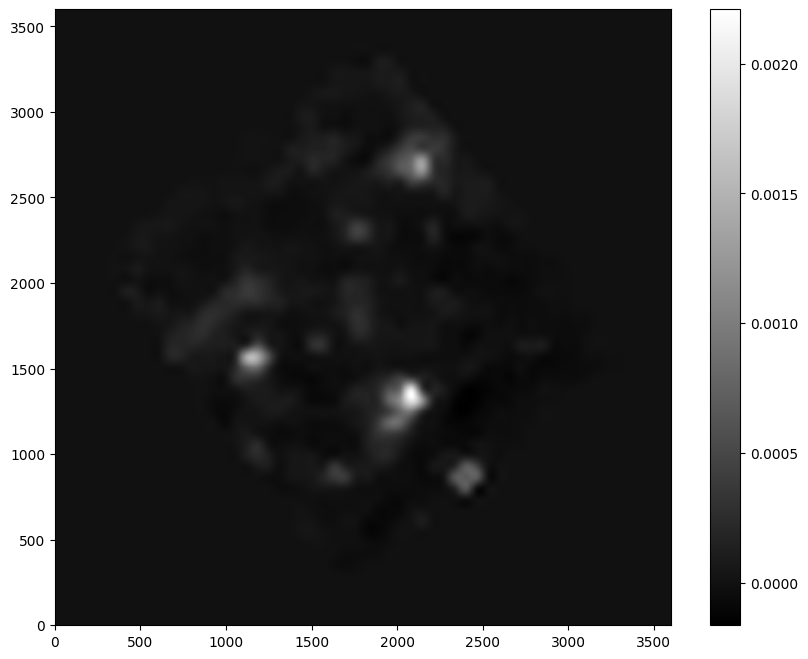

In [90]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.show()

In [91]:
objects = sep.extract(data, 1.5, err=bkg.globalrms)

In [92]:
# available fields
print(objects.dtype.names)

('thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2', 'y2', 'xy', 'errx2', 'erry2', 'errxy', 'a', 'b', 'theta', 'cxx', 'cyy', 'cxy', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag')


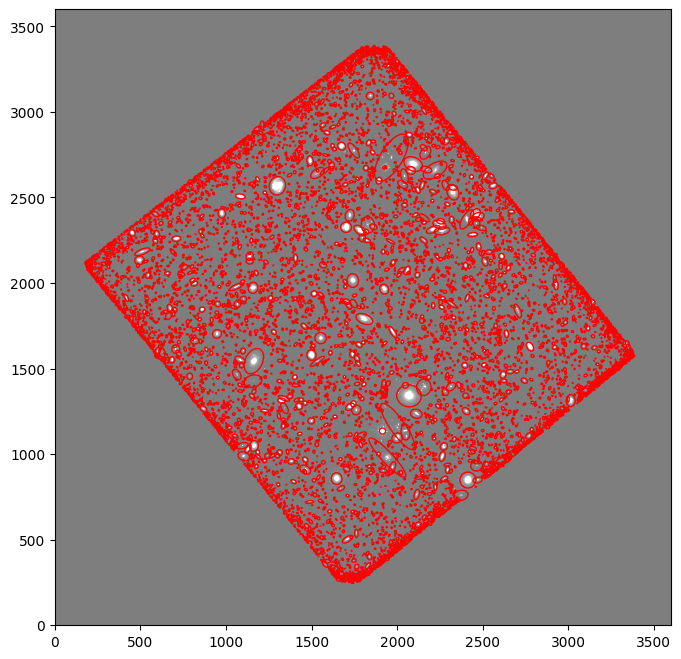

In [93]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [94]:
# Extract flux information for each object
flux, fluxerr, flag = sep.sum_circle(data, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

In [95]:
# Show the first 10 objects' results
for i in range(10):
    print("object {:d}: flux = {:.6f} +/- {:.6f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031267 +/- 0.176849
object 1: flux = 0.030996 +/- 0.176080
object 2: flux = -0.024416 +/- 0.002883
object 3: flux = 0.001976 +/- 0.044547
object 4: flux = 0.012423 +/- 0.111497
object 5: flux = -0.011182 +/- 0.002875
object 6: flux = 0.029318 +/- 0.171248
object 7: flux = -0.009093 +/- 0.002875
object 8: flux = 0.047987 +/- 0.219079
object 9: flux = 0.027778 +/- 0.166692
